In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
# Load dataset
file_path = '/content/Customers.csv'
df = pd.read_csv(file_path)


In [5]:
# Display basic information and first few rows
display(df.head())
print("\nDataset Information:")
print(df.info())
print(df.columns)

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB
None
Index(['CustomerID', 'Gender', 'Age', 'Annual Income ($)',
       'Spending Score (1-100)', 'Profession', 'Work Experience',
       'Family Size'],
      dtype='object')


In [6]:
# Renaming columns for consistency
df.rename(columns={'Annual Income ($)': 'Annual Income', 'Spending Score (1-100)': 'Spending Score'}, inplace=True)


In [7]:
# Selecting relevant features: Annual Income & Spending Score
X = df[['Annual Income', 'Spending Score']]


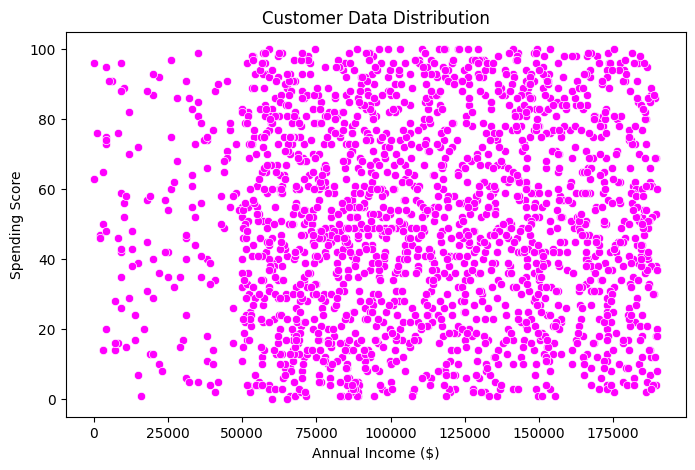

In [10]:
# Visualizing the data distribution
plt.figure(figsize=(8,5))
sns.scatterplot(x=X['Annual Income'], y=X['Spending Score'], color='magenta')
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score')
plt.title('Customer Data Distribution')
plt.show()

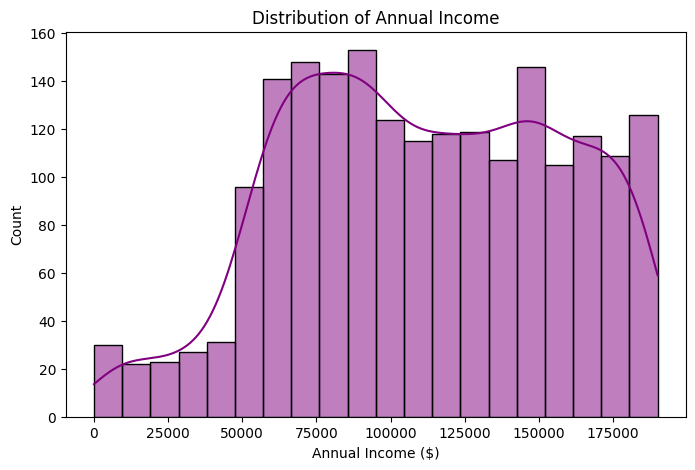

In [11]:
# Distribution of Annual Income
plt.figure(figsize=(8,5))
sns.histplot(df['Annual Income'], bins=20, kde=True, color='purple')
plt.xlabel('Annual Income ($)')
plt.ylabel('Count')
plt.title('Distribution of Annual Income')
plt.show()


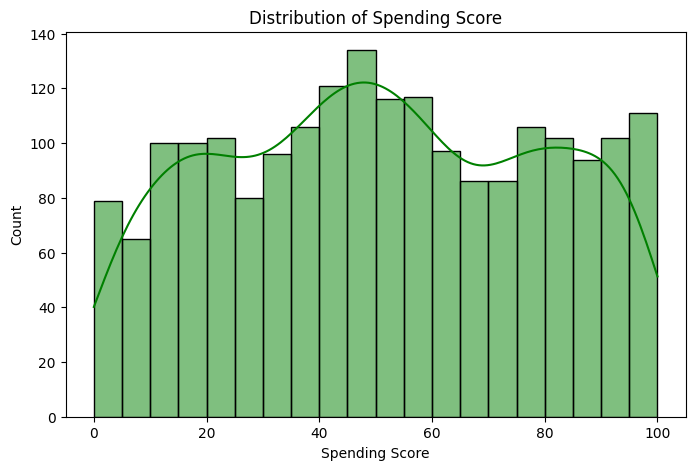

In [12]:
# Distribution of Spending Score
plt.figure(figsize=(8,5))
sns.histplot(df['Spending Score'], bins=20, kde=True, color='green')
plt.xlabel('Spending Score')
plt.ylabel('Count')
plt.title('Distribution of Spending Score')
plt.show()

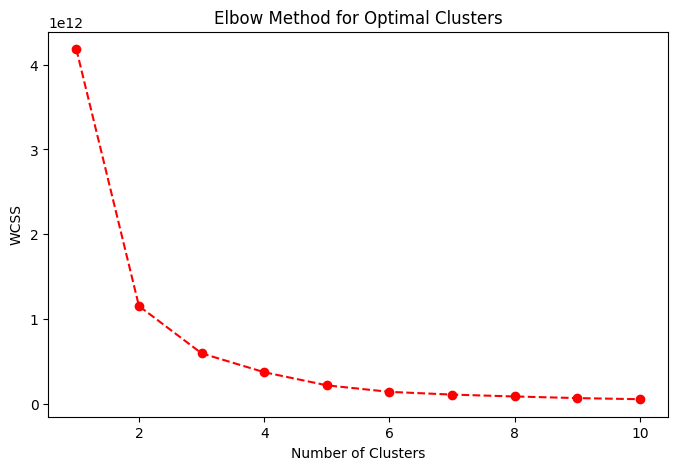

In [13]:
# Finding optimal clusters using Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

In [14]:
# Applying K-Means Clustering (choosing 5 clusters based on elbow method)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(X)


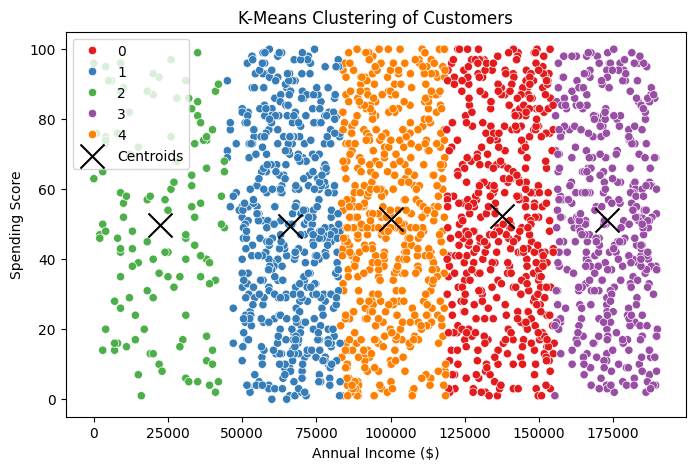

In [15]:
# Visualizing K-Means Clusters
plt.figure(figsize=(8,5))
sns.scatterplot(x=X['Annual Income'], y=X['Spending Score'], hue=df['KMeans_Cluster'], palette='Set1')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black', marker='x', label='Centroids')
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score')
plt.title('K-Means Clustering of Customers')
plt.legend()
plt.show()

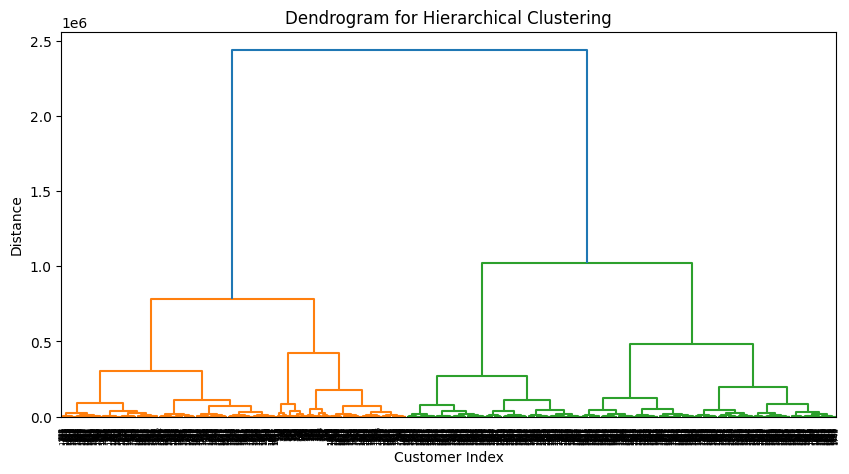

In [16]:
# Applying Hierarchical Clustering
linked = linkage(X, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linked, orientation='top', distance_sort='ascending', show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Customer Index')
plt.ylabel('Distance')
plt.show()


In [18]:
# Agglomerative Clustering (choosing 5 clusters based on dendrogram)
hc = AgglomerativeClustering(n_clusters=5, linkage='ward')  # Removed deprecated 'affinity' parameter
df['Hierarchical_Cluster'] = hc.fit_predict(X)

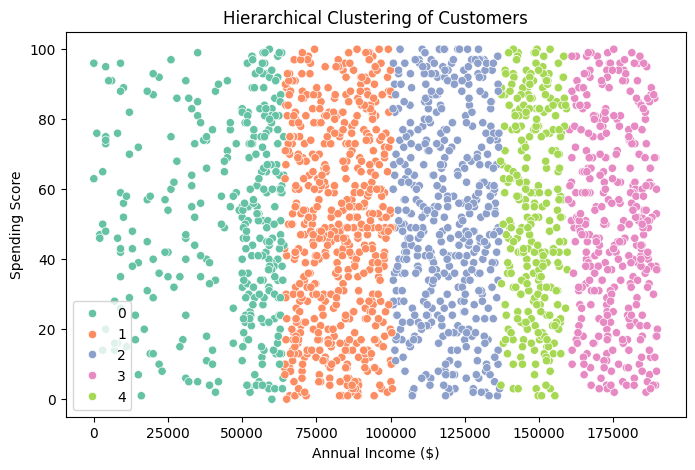

In [19]:
# Visualizing Hierarchical Clustering
plt.figure(figsize=(8,5))
sns.scatterplot(x=X['Annual Income'], y=X['Spending Score'], hue=df['Hierarchical_Cluster'], palette='Set2')
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score')
plt.title('Hierarchical Clustering of Customers')
plt.legend()
plt.show()


<ipython-input-20-7b8d0e975bd0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['KMeans_Cluster'], y=df['Annual Income'], palette='Set3')


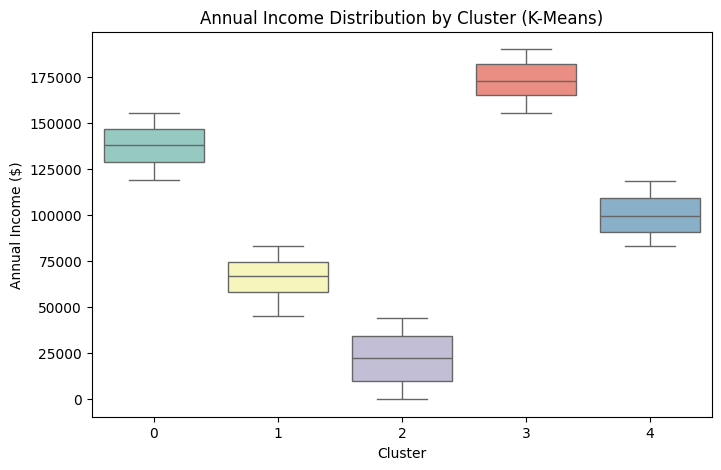

In [20]:
# Boxplot for Annual Income vs. Spending Score
plt.figure(figsize=(8,5))
sns.boxplot(x=df['KMeans_Cluster'], y=df['Annual Income'], palette='Set3')
plt.xlabel('Cluster')
plt.ylabel('Annual Income ($)')
plt.title('Annual Income Distribution by Cluster (K-Means)')
plt.show()


<ipython-input-21-96fb5ff1ca71>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['KMeans_Cluster'], y=df['Spending Score'], palette='coolwarm')


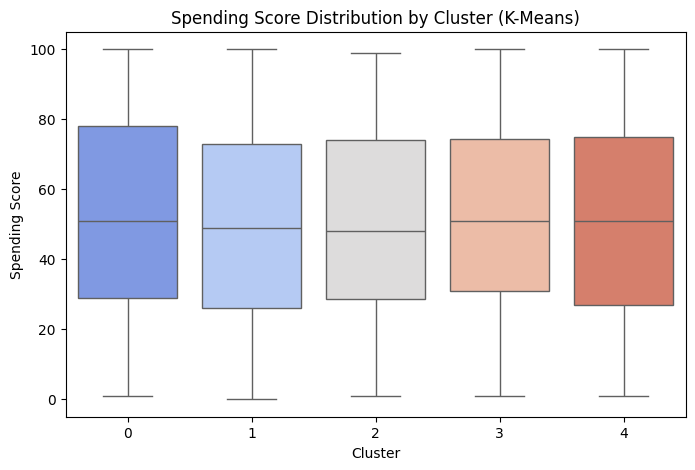

,CustomerID,Gender,Age,Annual Income,Spending Score,Profession,Work Experience,Family Size,KMeans_Cluster,Hierarchical_Cluster
0,1,Male,19,15000,39,Healthcare,1,4,2,0
1,2,Male,21,35000,81,Engineer,3,3,2,0
2,3,Female,20,86000,6,Engineer,1,1,4,1
3,4,Female,23,59000,77,Lawyer,0,2,1,0
4,5,Female,31,38000,40,Entertainment,2,6,2,0


In [21]:
# Boxplot for Spending Score vs. Clusters
plt.figure(figsize=(8,5))
sns.boxplot(x=df['KMeans_Cluster'], y=df['Spending Score'], palette='coolwarm')
plt.xlabel('Cluster')
plt.ylabel('Spending Score')
plt.title('Spending Score Distribution by Cluster (K-Means)')
plt.show()

# Display final dataset with assigned clusters
display(df.head())